# Creating a World Happiness Score Predictor

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In this notebook, we're going to go through the machine learning life cycle and implement a model for a regression problem. These are the tasks in order:  

1. Build DataFrame
2. Define ML Problem
3. Perform exploratory data analysis to understand data.
4. Define Project Plan
5. Implement Project Plan:
    * Prepare data
    * Fit model to the training data and evaluate model
    * Improve model's performance

## Part 1: Build DataFrame

Use the World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`

#### Load a Data Set and Save it as a Pandas DataFrame

Load the data using `pd.read_csv()` and save it to DataFrame `df`.

In [ ]:
# File name of the data sets
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(WHRDataSet_filename, header=0)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define ML Problem

1. The data set I chose is WHR2018Chapter2OnlineData.csv which is the World Happiness Report.
2. I will be predicting the happiness score of a country. The label will be the Life Ladder, which is the happiness score.
3. This is a supervised learning problem and it is a regression problem.
4. For now, my features are all of the features excluding the life ladder. This may change after exploring the data.
5. Predicting the happiness score of a country is an important problem because knowing what factors might contribute to happiness can help the government and leaders create policies that improve people's quality of life. This model is valuable and beneficial for companies because they can use this information to figure out which countries are the most economically stable and ideal to expand their market in. A company focused on social good could use this information to find countries that would benefit the most from their mission. Companies could also use this model to inform and consult with governments and policymakers, such as finding areas to improve happiness.

## Part 3: Understand the Data

The next step is to perform exploratory data analysis. Inspect and analyze the data set with your machine learning problem in mind. Consider the following:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?


3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Techniques like using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If working on a classification problem, use techniques to determine if there is class imbalance.

Inspect and analyze the data:

To <b/>inspect</b> the data, I will display the number of rows and columns, the column names, and use the describe() method and dtypes to learn more about each column.

In [ ]:
print(df.shape)
print(df.columns)

(1562, 19)
Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')


In [ ]:
for column in list(df.columns):
    print(df[column].describe())

count         1562
unique         164
top       Zimbabwe
freq            12
Name: country, dtype: object
count    1562.000000
mean     2011.820743
std         3.419787
min      2005.000000
25%      2009.000000
50%      2012.000000
75%      2015.000000
max      2017.000000
Name: year, dtype: float64
count    1562.000000
mean        5.433676
std         1.121017
min         2.661718
25%         4.606351
50%         5.332600
75%         6.271025
max         8.018934
Name: Life Ladder, dtype: float64
count    1535.000000
mean        9.220822
std         1.184035
min         6.377396
25%         8.310665
50%         9.398610
75%        10.190634
max        11.770276
Name: Log GDP per capita, dtype: float64
count    1549.000000
mean        0.810669
std         0.119370
min         0.290184
25%         0.748304
50%         0.833047
75%         0.904329
max         0.987343
Name: Social support, dtype: float64
count    1553.000000
mean       62.249887
std         7.960671
min        37.766476


In [ ]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

I'm going to <b/>rename</b> some of the features and the label to make it simpler to read. I'm going to use a dictionary and the Pandas rename() method. Some features will be removed later such as 'Standard deviation of ladder by country-year' since it could cause feature leakage by providing information about the Life Ladder.

In [ ]:
renamed_dict = {'Life Ladder': 'Happiness',
            'Log GDP per capita': 'LogGDP',
            'Healthy life expectancy at birth': 'Life Expectancy',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Corruption',
            'Positive affect': 'Positive',
            'Negative affect': 'Negative',
            'Confidence in national government': 'Confidence',
            'gini of household income reported in Gallup, by wp5-year': 'gini household income'}

df.rename(columns=renamed_dict, inplace=True)
df.columns

Index(['country', 'year', 'Happiness', 'LogGDP', 'Social support',
       'Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Positive',
       'Negative', 'Confidence', 'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini household income'],
      dtype='object')

In [ ]:
df.head(3)

,country,year,Happiness,LogGDP,Social support,Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15",gini household income
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318


Since I will be training a model that predicts the happiness score of a country, this is a supervised learning and regression problem. The label will be a real/continuous number so our label will be the Happiness column.

First, I will inspect the values in the label column.

In [ ]:
df['Happiness']

0       3.723590
1       4.401778
2       4.758381
3       3.831719
4       3.782938
          ...   
1557    4.690188
1558    4.184451
1559    3.703191
1560    3.735400
1561    3.638300
Name: Happiness, Length: 1562, dtype: float64

Since the happiness score is on a scale from 0-10, I'm curious to know what country had the highest score.

In [ ]:
# Find the country with the highest happiness score
df.nlargest(1, 'Happiness')

,country,year,Happiness,LogGDP,Social support,Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15",gini household income
364,Denmark,2005,8.018934,10.70477,0.972372,68.113411,0.971135,NaN,0.236522,0.859549,0.153672,0.668683,1.407144,2.001794,1.340592,0.167178,0.252,0.267091,NaN


Next, I will identify the features, which, for now, will be the remaining columns in the dataset.

In [ ]:
features = df.loc[:, df.columns != 'Happiness']
features

,country,year,LogGDP,Social support,Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15",gini household income
0,Afghanistan,2008,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


It looks like there are some <b/>missing values</b>. I will check how many missing values are in the columns.

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                0
year                                                   0
Happiness                                              0
LogGDP                                                27
Social support                                        13
Life Expectancy                                        9
Freedom                                               29
Generosity                                            80
Corruption                                            90
Positive                                              18
Negative                                              12
Confidence                                           161
Democratic Quality                                   171
Delivery Quality                                     171
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI index (World Bank estimate)                     979
GINI index (World Bank estimate

I will <b/>remove</b> examples with a small amount of missing values. Some columns, like GINI index (World Bank estimate), have a lot of missing values, so it might be better to remove those features since they aren't providing a lot of information for prediction. I will <b/>impute</b> the values for Confidence, Democratic Quality and Delivery Quality.

In [ ]:
# Remove columns with a high number of missing values
df.drop(columns = ['GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini household income'], inplace=True)
df.columns
np.sum(df.isnull(), axis = 0)

country                                                0
year                                                   0
Happiness                                              0
LogGDP                                                27
Social support                                        13
Life Expectancy                                        9
Freedom                                               29
Generosity                                            80
Corruption                                            90
Positive                                              18
Negative                                              12
Confidence                                           161
Democratic Quality                                   171
Delivery Quality                                     171
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
dtype: int64

In [ ]:
# Impute values for Confidence, Democratic Quality, and Delivery Quality

# Replace the missing values in with the mean values of the column
mean_confidence = df['Confidence'].mean()
df['Confidence'].fillna(value=mean_confidence, inplace=True)

mean_democratic_qual = df['Democratic Quality'].mean()
df['Democratic Quality'].fillna(value=mean_democratic_qual, inplace=True)

mean_delivery_qual = df['Delivery Quality'].mean()
df['Delivery Quality'].fillna(value=mean_delivery_qual, inplace=True)

# Check results
np.sum(df.isnull(), axis = 0)

country                                               0
year                                                  0
Happiness                                             0
LogGDP                                               27
Social support                                       13
Life Expectancy                                       9
Freedom                                              29
Generosity                                           80
Corruption                                           90
Positive                                             18
Negative                                             12
Confidence                                            0
Democratic Quality                                    0
Delivery Quality                                      0
Standard deviation of ladder by country-year          0
Standard deviation/Mean of ladder by country-year     0
dtype: int64

In [ ]:
# Remove missing examples from remaining columns with few missing values
df = df.dropna(axis=0)
np.sum(df.isnull(), axis = 0)

country                                              0
year                                                 0
Happiness                                            0
LogGDP                                               0
Social support                                       0
Life Expectancy                                      0
Freedom                                              0
Generosity                                           0
Corruption                                           0
Positive                                             0
Negative                                             0
Confidence                                           0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
dtype: int64

In [ ]:
df.shape

(1390, 16)

To detect <b/>outliers</b>, I'm going to visualize the outliers with a box and whisker plot. I will do this for each feature column.

AxesSubplot(0.125,0.11;0.775x0.77)


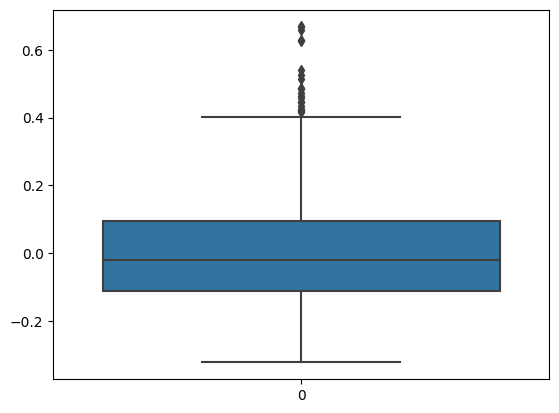

In [ ]:
#print(sns.boxplot(df['LogGDP']))
#print(sns.boxplot(df['Social support']))
#print(sns.boxplot(df['Life Expectancy']))
#print(sns.boxplot(df['Freedom']))
print(sns.boxplot(df['Generosity']))
#print(sns.boxplot(df['Corruption']))
#print(sns.boxplot(df['Positive']))
#print(sns.boxplot(df['Negative']))
#print(sns.boxplot(df['Confidence']))
#print(sns.boxplot(df['Democratic Quality']))
#print(sns.boxplot(df['Delivery Quality']))
#print(sns.boxplot(df['Standard deviation of ladder by country-year']))
#print(sns.boxplot(df['Standard deviation/Mean of ladder by country-year']))

There are some features that have outliers, with some having more outliers than others. I'm not sure if winsorization is necessary for my dataset, so I'm going to create a reference list of features to undergo <b/>winsorization</b>. I will compare the before and after results of this test winsorization and decide which features should be winsorized.

In [ ]:
toWinsorize = ['Social support', 'Life Expectancy', 'Freedom', 'Generosity',
               'Corruption', 'Negative', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year']
# compute mean value of each of these columns to compare after winsorization
beforeAvg = []
for column in toWinsorize:
    beforeAvg.append(df.loc[:, column].mean())
beforeAvg

[0.8083193011597122,
 62.04225410346043,
 0.7241309036359712,
 0.0014638609323741009,
 0.7567729106532374,
 0.2632063808489209,
 1.9988639160446044,
 0.3889093778028777]

The mean value of each column before winsorization:
[0.8083193011597122,
 62.04225410346043,
 0.7241309036359712,
 0.0014638609323741009,
 0.7567729106532374,
 0.2632063808489209,
 1.9988639160446044,
 0.3889093778028777]

In [ ]:
import scipy.stats as stats

# winsorize columns
#df['Social support'] = stats.mstats.winsorize(df['Social support'], limits=[0.05, 0])
#print(sns.boxplot(df['Social support'])) # to check
#df['Life Expectancy'] = stats.mstats.winsorize(df['Life Expectancy'], limits=[0.01, 0])
#print(sns.boxplot(df['Life Expectancy'])) # to check
#df['Freedom'] = stats.mstats.winsorize(df['Freedom'], limits=[0.01, 0])
#print(sns.boxplot(df['Freedom'])) # to check
#df['Generosity'] = stats.mstats.winsorize(df['Generosity'], limits=[0, 0.05])
#print(sns.boxplot(df['Generosity'])) # to check
#df['Corruption'] = stats.mstats.winsorize(df['Corruption'], limits=[0.05, 0])
#print(sns.boxplot(df['Corruption'])) # to check
#df['Negative'] = stats.mstats.winsorize(df['Negative'], limits=[0, 0.05])
#print(sns.boxplot(df['Negative'])) # to check
#df['Standard deviation of ladder by country-year'] = stats.mstats.winsorize(df['Standard deviation of ladder by country-year'], limits=[0.01, 0.05])
#print(sns.boxplot(df['Standard deviation of ladder by country-year'])) # to check
#df['Standard deviation/Mean of ladder by country-year'] = stats.mstats.winsorize(df['Standard deviation/Mean of ladder by country-year'], limits=[0, 0.05])
#print(sns.boxplot(df['Standard deviation/Mean of ladder by country-year'])) # to check

I'm going to calculate the mean values of the now winsorized columns to see if there were any significant changes.

In [ ]:
#afterAvg = []
#for column in toWinsorize:
#    afterAvg.append(df.loc[:, column].mean())
#afterAvg

None of the columns really showed a significant difference after winsorization:

[0.8117137796647482,
 62.06006426632374,
 0.7245582856381295,
 -0.002929188139568346,
 0.7620386976395683,
 0.2605169722482014,
 1.9886478244805756,
 0.38455140231438845]

 I am going to edit the above code blocks so that it is commented out and reset the dataset to before winsorization.

Next, I will check the <b/>correlation</b> between the features and the label.

In [ ]:
df[df.columns[1:]].corr()['Happiness'][:]

year                                                 0.011035
Happiness                                            1.000000
LogGDP                                               0.776549
Social support                                       0.700813
Life Expectancy                                      0.738547
Freedom                                              0.518977
Generosity                                           0.204567
Corruption                                          -0.437365
Positive                                             0.556652
Negative                                            -0.267120
Confidence                                          -0.077784
Democratic Quality                                   0.603590
Delivery Quality                                     0.684034
Standard deviation of ladder by country-year        -0.152031
Standard deviation/Mean of ladder by country-year   -0.755533
Name: Happiness, dtype: float64

I will get <b/>remove the irrelevant features</b>, as well as some features that are weakly correlated to the label. A value close to 0 means no linear relationship. +1 means a positive linear relationship and -1 indicates a negative linear relationship. I will also remove features that don't provide much information for our problem or would cause a leakage problem.

In [ ]:
# remove irrelevant features
df.drop(columns = ['year', 'Confidence', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year',
                    'Standard deviation/Mean of ladder by country-year'], inplace=True)
df.columns

Index(['country', 'Happiness', 'LogGDP', 'Social support', 'Life Expectancy',
       'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative'],
      dtype='object')

I'm going to visualize the relationships between some of the features and the label to see if it is linear or nonlinear. This will help decide what model I should choose.

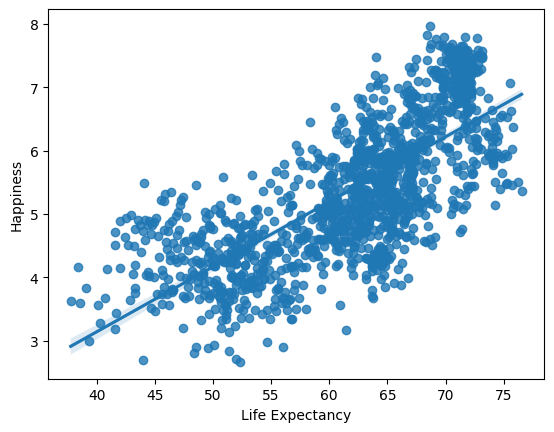

In [ ]:
# plot the relationship between the features and the label
sns.regplot(x='Life Expectancy', y='Happiness', data=df);

## Part 4: Define Project Plan

- I have a new feature list. After inspecting the data, I chose to keep 'LogGDP', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Positive', and 'Negative'. I removed 'Confidence', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', and 'gini of household income reported in Gallup, by wp5-year'.
- Different data preparation techniques I used to prepare my data for modeling were: imputation and removing examples and columns that had missing data, detecting and handling outliers with winsorization, removing irrelevant features, and renaming features and labels for easier readability.
- My model will be an ensemble model using the Random Forest Regressor algorithm.
- For my regression problem, I will train a Random Forest Regressor model. I will create my labeled examples and split my data so I have a training, validation, and test set. Then, I will fit my model to the training data, evaluate it with R2 and RMSE, and optimize my model based on how overfit or underfit it is. I will perform cross-validation and train and test subsets of my data. I will perform feature selection and model selection to improve the performance of my model. I will also tune my hyperparameters with gridsearch and find the best settings for my model.


## Part 5: Implement Project Plan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

## 1. Data Preparation

As part of <b/>Data Preparation</b>, in Part 3 Data Analysis, I have already:

- dealt with missing data using imputation and removal
- detected outliers and practiced winsorization (but decided it was not necessary)
- removed irrelevant features
- renamed features and the label

## 2. Model Building and Evaluation

There is a linear relationship between the features and the label, and my problem is a regression problem. I will be training a Random Forest Regressor model.

First, I will create <b/>labeled examples</b> and create <b/>training, validation, and test data sets</b>.

In [ ]:
# create training and test set
features = ['LogGDP', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']

y = df['Happiness']
X = df[features]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # 20% test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 20% validation, 60% training

Next, I will <b/>train a Random Forest Regressor</b> and perform <b/> Grid Search </b> cross-validation.

In [ ]:
print('Running Grid Search...')

# create the Random Forest Regressor model
rf_model = RandomForestRegressor()

# create hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in forest
    'max_depth': [3, 5, 7],  # max depth of the tree
    'min_samples_split': [2, 6, 10],  # min number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],  # min number of samples required to be at a leaf node.
}

# run GridSearchCV with 5-fold cross-validation using rf_model.
grid = GridSearchCV(rf_model, param_grid, scoring = 'r2', cv=5)

# fit the model to the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


I will <b/>identify the best hyperparameters</b> using best_params_ and get the accuracy score.

In [ ]:
# print best hyperparameteres
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))
# print best R2 score resulting from this configuration
print('R2 score: {0}'.format(grid_search.best_score_))

Optimal hyperparameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
R2 score: 0.8392128093809234


Now I'm going to train a Random Forest Regressor model using these optimized hyperparameters.

In [ ]:
# 1. Create a RandomForestRegressor model object
optimized_rfmodel = RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50)

# 2. Fit the model to the training data
optimized_rfmodel.fit(X_train, y_train)

# 3. Use the predict() method to make predictions on the validation data and assign the results to the variable 'class_label_predictions'
class_label_predictions = optimized_rfmodel.predict(X_val)

# 4. Compute RMSE and R2 score
optimized_rmse = mean_squared_error(y_val, class_label_predictions, squared=False)
optimized_r2 = r2_score(y_val, class_label_predictions)

print('[RF] Root Mean Squared Error: {0}'.format(optimized_rmse))
print('[RF] R2: {0}'.format(optimized_r2))

[RF] Root Mean Squared Error: 0.4548162962862256
[RF] R2: 0.8455620600068418


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 3. Optimization

I'm going to perform <b/> feature selection </b> to find which features are the most important.

In [ ]:
#1. Obtain "feature importance" scores from the model object and save the array to the variable 'feature_imp'

feature_imp = optimized_rfmodel.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores.
# Save the result to the variable 'df_features'

df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

df_sorted = df_features.sort_values(by='imp', ascending=False)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five'

top_five = list(df_sorted.iloc[:5]['name'])
print('Top five features: {0}'.format(top_five))

Top five features: ['Life Expectancy', 'LogGDP', 'Social support', 'Positive', 'Generosity']


I will train another model with these top features and a different set of parameters to see if it performs better.

In [ ]:
# create training and test set
top_features = ['LogGDP', 'Social support', 'Life Expectancy', 'Generosity', 'Positive']
y = df['Happiness']
X = df[top_features]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 20% validation, 60% training

print('Running Grid Search...')
# create the Random Forest Regressor model
rf_model2 = RandomForestRegressor()
# create hyperparameter grid
new_param_grid = {
    'n_estimators': [50, 100, 200, 300],  # number of trees in forest
    'max_depth': [3, 5, 7, 10],  # max depth of the tree
    'min_samples_split': [2, 6, 10],  # min number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],  # min number of samples required to be at a leaf node.
}
# run GridSearchCV with 5-fold cross-validation using rf_model.
new_grid = GridSearchCV(rf_model2, new_param_grid, scoring = 'r2', cv=5)
# fit the model to the training data
new_grid_search = new_grid.fit(X_train, y_train)
print('Done')

# print best hyperparameteres
print('Optimal hyperparameters: {0}'.format(new_grid_search.best_params_))
# print best R2 score resulting from this configuration
print('R2 score: {0}'.format(new_grid_search.best_score_))

Running Grid Search...
Done
Optimal hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
R2 score: 0.8433759424338131


In [ ]:
# 1. Create a RandomForestRegressor model object
optimized_rfmodel2 = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
# 2. Fit the model to the training data
optimized_rfmodel2.fit(X_train, y_train)
# 3. Use the predict() method to make predictions on the validation data
new_class_label_predictions = optimized_rfmodel2.predict(X_val)
# 4. Compute RMSE and R2 score
second_rmse = mean_squared_error(y_val, new_class_label_predictions, squared=False)
second_r2 = r2_score(y_val, new_class_label_predictions)

print('[RF] Root Mean Squared Error: {0}'.format(second_rmse))
print('[RF] R2: {0}'.format(second_r2))

[RF] Root Mean Squared Error: 0.4517257354197763
[RF] R2: 0.8476537976473931


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Now I will compare the models and plot their performances.

In [ ]:
print('Root Mean Squared Error: 1st model- {0}'.format(optimized_rmse))
print('Root Mean Squared Error: 2nd model- {0}'.format(second_rmse))
print('R2: 1st model- {0}'.format(optimized_r2))
print('R2: 2nd model- {0}'.format(second_r2))

Root Mean Squared Error: 1st model- 0.4548162962862256
Root Mean Squared Error: 2nd model- 0.4517257354197763
R2: 1st model- 0.8455620600068418
R2: 2nd model- 0.8476537976473931


For RMSE, a lower value means better fit and predictions. For R2, a higher value means better performance. It looks like the 2nd model performed a little better, although there really isn't much of a difference. I will be using the 2nd model, optimized_rfmodel2.

Now that I have chosen my model, I will train my best model on the test data set.

In [ ]:
# 3. Use the predict() method to make predictions on the test data
best_class_label_predictions = optimized_rfmodel2.predict(X_test)
# 4. Compute RMSE and R2 score
rmse_score = mean_squared_error(y_test, best_class_label_predictions, squared=False)
r2_score = r2_score(y_test, best_class_label_predictions)

print('[RF] Root Mean Squared Error: {0}'.format(rmse_score))
print('[RF] R2: {0}'.format(r2_score))

[RF] Root Mean Squared Error: 0.45552108110755934
[RF] R2: 0.8441248059293266


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Finally, I'll plot the results. I want to see the predicted vs the actual values for happiness scores per country.

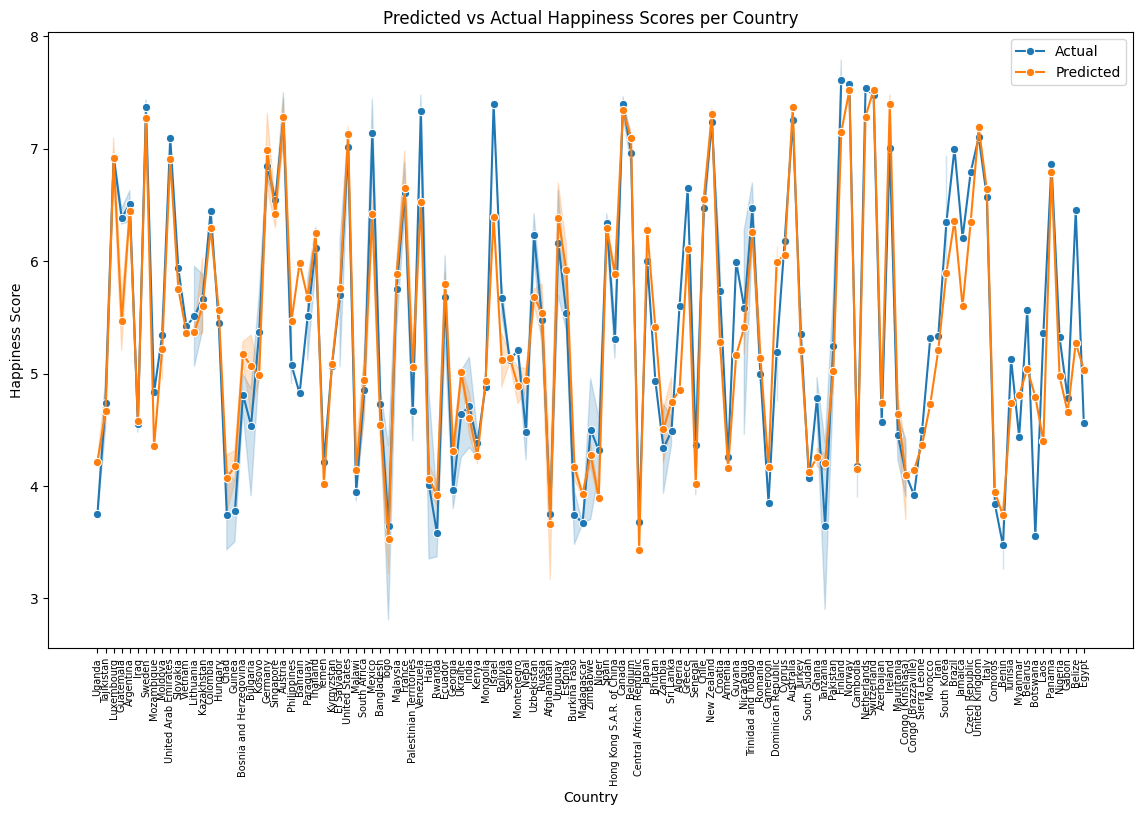

In [ ]:
results_df = pd.DataFrame({'Country': df.loc[y_test.index, 'country'], 'Actual': y_test, 'Predicted': best_class_label_predictions})
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Country', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Country', y='Predicted', label='Predicted', marker='o')

plt.title('Predicted vs Actual Happiness Scores per Country')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=90)
plt.legend()
plt.show()